In [1]:
%matplotlib inline



# Shortest Paths

This example demonstrates how to find the shortest distance between two vertices
of a weighted or an unweighted graph.


In [2]:
import igraph as ig
import matplotlib.pyplot as plt

To find the shortest path or distance between two nodes, we can use :meth:`igraph.GraphBase.get_shortest_paths`. If we're only interested in counting the unweighted distance, then we can do the following:



In [3]:
g = ig.Graph(
    6,
    [(0, 1), (0, 2), (1, 3), (2, 3), (2, 4), (3, 5), (4, 5)]
)
results = g.get_shortest_paths(1, to=4, output="vpath")

# results = [[1, 0, 2, 4]]

We can print the result of the computation:



In [4]:
if len(results[0]) > 0:
    # The distance is the number of vertices in the shortest path minus one.
    print("Shortest distance is: ", len(results[0])-1)
else:
    print("End node could not be reached!")

Shortest distance is:  3


If the edges have weights, things are a little different. First, let's add
weights to our graph edges:



In [5]:
g.es["weight"] = [2, 1, 5, 4, 7, 3, 2]

To get the shortest paths on a weighted graph, we pass the weights as an
argument. For a change, we choose the output format as ``"epath"`` to
receive the path as an edge list, which can be used to calculate the length
of the path.



In [6]:
results = g.get_shortest_paths(0, to=5, weights=g.es["weight"], output="epath")

# results = [[1, 3, 5]]

if len(results[0]) > 0:
    # Add up the weights across all edges on the shortest path
    distance = 0
    for e in results[0]:
        distance += g.es[e]["weight"]
    print("Shortest weighted distance is: ", distance)
else:
    print("End node could not be reached!")

Shortest weighted distance is:  8


<div class="alert alert-info"><h4>Note</h4><p>- :meth:`igraph.GraphBase.get_shortest_paths` returns a list of lists becuase the `to` argument can also accept a list of vertex IDs. In that case, the shortest path to all each vertex is found and stored in the results array.
    - If you're interested in finding *all* shortest paths, take a look at :meth:`igraph.GraphBase.get_all_shortest_paths`.</p></div>



In case you are wondering how the visualization figure was done, here's the code:



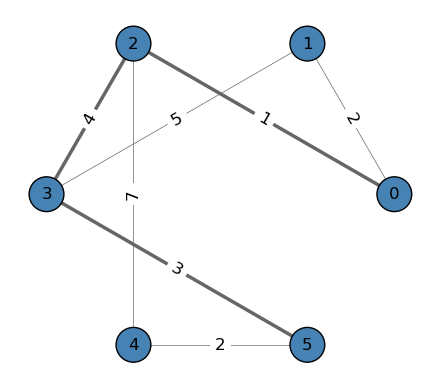

In [7]:
g.es['width'] = 0.5
g.es[results[0]]['width'] = 2.5

fig, ax = plt.subplots()
ig.plot(
    g,
    target=ax,
    layout='circle',
    vertex_color='steelblue',
    vertex_label=range(g.vcount()),
    edge_width=g.es['width'],
    edge_label=g.es["weight"],
    edge_color='#666',
    edge_align_label=True,
    edge_background='white'
)
plt.show()